@[top](目录)

**Pytorch一般有以下几个流程**


### 1.数据读取

### 2.数据处理

### 3.搭建网络

### 4.模型训练

### 5.模型上线


主要包括以上几个阶段，每个阶段又可以细分，后面再说


### 1.数据读取
CIFAR-10 是由 Hinton 的学生 Alex Krizhevsky 和 Ilya Sutskever 整理的一个用于识别普适物体的小型数据集。一共包含 10 个类别的 RGB 彩色图 片：飞机（ arplane ）、汽车（ automobile ）、鸟类（ bird ）、猫（ cat ）、鹿（ deer ）、狗（ dog ）、蛙类（ frog ）、马（ horse ）、船（ ship ）和卡车（ truck ）。图片的尺寸为 32×32 ，数据集中一共有 50000 张训练圄片和 10000 张测试图片。 

与 MNIST 数据集中目比， CIFAR-10 具有以下不同点：

    • CIFAR-10 是 3 通道的彩色 RGB 图像，而 MNIST 是灰度图像。
    • CIFAR-10 的图片尺寸为 32×32， 而 MNIST 的图片尺寸为 28×28，比 MNIST 稍大。
    • 相比于手写字符， CIFAR-10 含有的是现实世界中真实的物体，不仅噪声很大，而且物体的比例、 特征都不尽相同，这为识别带来很大困难。

首先使用`torchvision`加载和归一化我们的训练数据和测试数据。

    a、`torchvision`这个东西，实现了常用的一些深度学习的相关的图像数据的加载功能，比如cifar10、Imagenet、Mnist等等的，保存在`torchvision.datasets`模块中。
    
    b、同时，也封装了一些处理数据的方法。保存在`torchvision.transforms`模块中
    
    c、还封装了一些模型和工具封装在相应模型中,比如`torchvision.models`当中就包含了AlexNet，VGG，ResNet，SqueezeNet等模型。

In [1]:
#首先导入torch，torchvision模块

import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms

**由于torchvision的datasets的输出是[0,1]的PILImage，所以我们先先归一化为[-1,1]的Tensor**

首先定义了一个变换transform，利用的是上面提到的transforms模块中的Compose( )把多个变换组合在一起，可以看到这里面组合了ToTensor和Normalize这两个变换

`transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))`前面的（0.5，0.5，0.5） 是 R G B 三个通道上的均值， 后面(0.5, 0.5, 0.5)是三个通道的标准差，注意通道顺序是 R G B ，用过opencv的同学应该知道openCV读出来的图像是 BRG顺序。这两个tuple数据是用来对RGB 图像做归一化的，如其名称 Normalize 所示这里都取0.5只是一个近似的操作，实际上其均值和方差并不是这么多，但是就这个示例而言 影响可不计。精确值是通过分别计算R,G,B三个通道的数据算出来的。


In [2]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) 

In [3]:
# datasets.CIFAR10( )也是封装好了的，就在我前面提到的torchvision.datasets块中
trainset = datasets.CIFAR10(root='D:/CIFAR-10', train=True,download=True, transform=transform)

Files already downloaded and verified


 `trainloader`其实是一个比较重要的东西，我们后面就是通过`trainloader`把数据传入网络，当然这里的`trainloader`其实是个变量名，可以随便取，重点是他是由后面的`torch.utils.data.DataLoader()`定义的，这个东西来源于`torch.utils.data`模块

In [4]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,shuffle=True, num_workers=2)

In [5]:
# 对于测试集的操作和训练集一样，我就不赘述了
testset = torchvision.datasets.CIFAR10(root='D:/CIFAR-10', train=False,download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,shuffle=False, num_workers=2)
    # 类别信息也是需要我们给定的
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


In [6]:
trainset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [7]:
trainset.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

### 2. 查看数据（格式，大小，形状）

In [8]:
trainset.data

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [9]:
trainset.data.shape#50000是图片数量，32x32是图片大小，3是通道数量RGB

(50000, 32, 32, 3)

In [10]:
trainset.data[10000][31][31][2]

168

In [11]:
#查看数据类型
print(type(trainset.data))
print(type(trainset))

<class 'numpy.ndarray'>
<class 'torchvision.datasets.cifar.CIFAR10'>


In [12]:
trainset[10000][0][2][31][31]#10000为图片数量，0表示取前面的数据，2表示通道数RGB，32*32表示图片大小

tensor(0.3176)

### 总结：
    
    `trainset.data.shape`是标准的numpy.ndarray类型，其中50000是图片数量，32x32是图片大小，3是通道数量RGB；
    `trainset`是标准的？？类型，其中50000为图片数量，0表示取前面的数据，2表示3通道数RGB，32*32表示图片大小
    
 ### 3. 查看图片

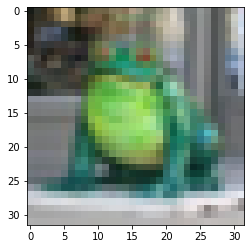

In [13]:
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(trainset.data[19])

### np.ndarray转为torch.Tensor

在深度学习中，原始图像需要转换为深度学习框架自定义的数据格式，在pytorch中，需要转为`torch.Tensor`。
pytorch提供了`torch.Tensor` 与`numpy.ndarray`转换为接口：

方法名|作用
--|--
`torch.from_numpy(xxx)`|`numpy.ndarray`转为torch.Tensor
`tensor1.numpy()`|获取tensor1对象的numpy格式数据

`torch.Tensor` 高维矩阵的表示： N x C x H x W

`numpy.ndarray` 高维矩阵的表示：N x H x W x C

因此在两者转换的时候需要使用`numpy.transpose( )` 方法 。


In [14]:
# numpy image: H x W x C
# torch image: C x H x W
# np.transpose( xxx,  (2, 0, 1))   # 将 H x W x C 转化为 C x H x W
tensor_skimage = torch.from_numpy(np.transpose(trainset.data[19], (2, 0, 1)))
tensor_skimage.size()

torch.Size([3, 32, 32])

### torch.Tensor转numpy.ndarray

In [15]:
# np.transpose( xxx,  (2, 0, 1))   # 将 C x H x W 转化为 H x W x C
img_skimage_2 = np.transpose(trainset[19][0].numpy(), (1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


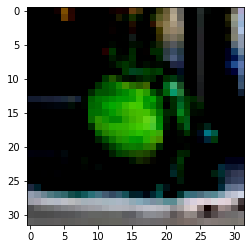

In [16]:
plt.imshow(img_skimage_2)

### 4.定义网络（AlexNet）

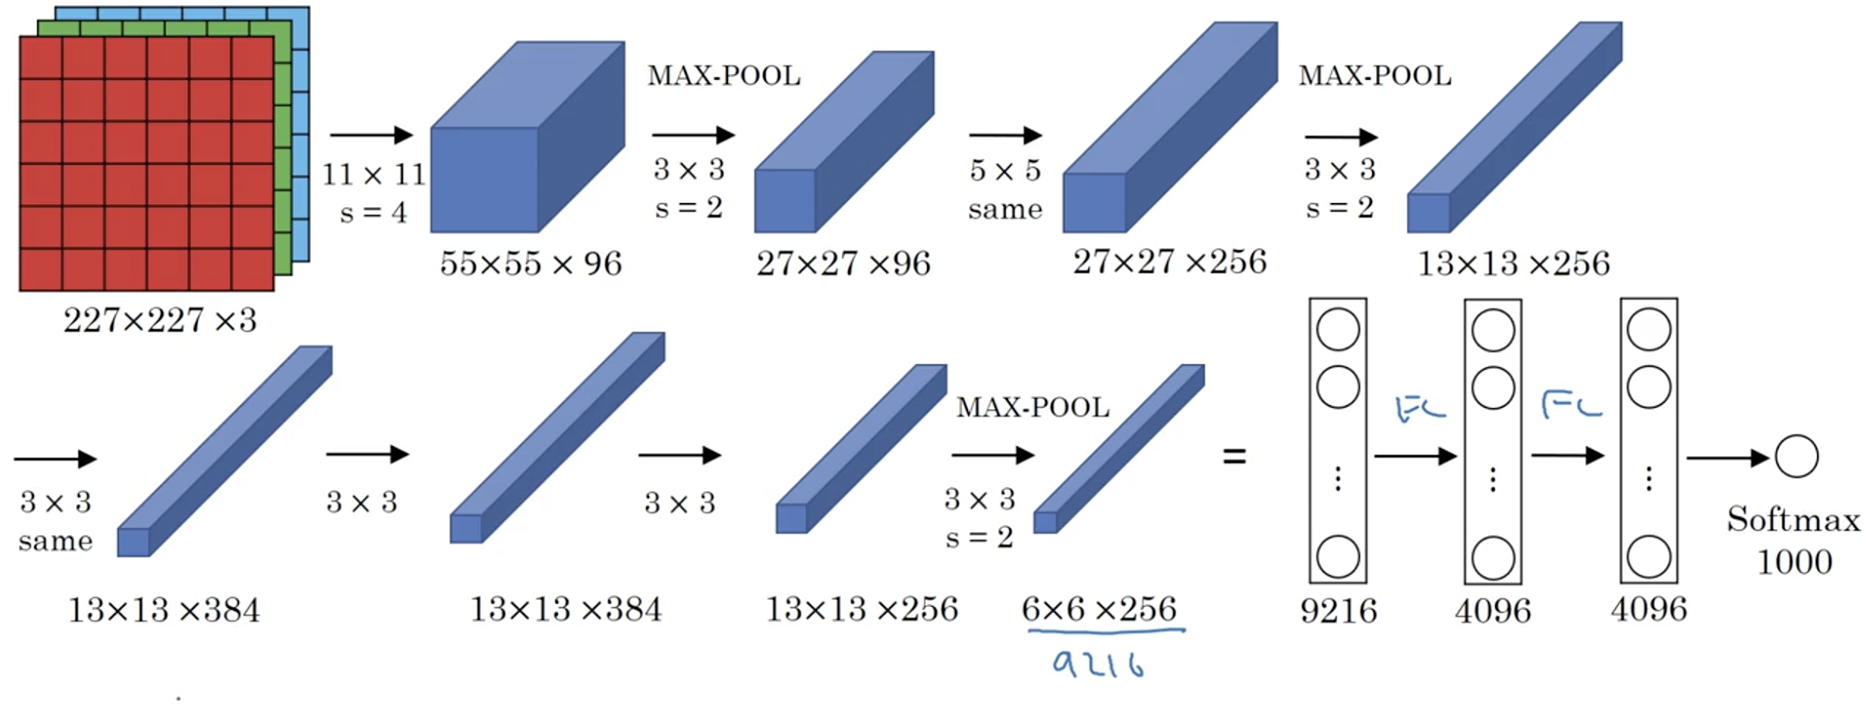

**AlexNet 结构：**

    输入层：图像大小为 227×227×3，其中 3 表示输入图像的 channel 数（R，G，B）为 3。
    
    卷积层：filter 大小 11×11，filter 个数 96，卷积步长 s=4。（filter 大小只列出了宽和高，filter矩阵的 channel 数和输入图片的 channel 数一样，在这里没有列出）
    
    池化层：max pooling，filter 大小 3×3，步长 s=2。
    
    卷积层：filter 大小 5×5，filter 个数 256，步长 s=1，padding 使用 same convolution，即使得卷积层输出图像和输入图像在宽和高上保持不变。
    
    池化层：max pooling，filter 大小 3×3，步长 s=2。
    
    卷积层：filter 大小 3×3，filter 个数 384，步长 s=1，padding 使用 same convolution。
    
    卷积层：filter 大小 3×3，filter 个数 384，步长 s=1，padding 使用 same convolution。
    
    卷积层：filter 大小 3×3，filter 个数 256，步长 s=1，padding 使用 same convolution。
    
    池化层：max pooling，filter 大小 3×3，步长 s=2；池化操作结束后，将大小为  6×6×256 的输出矩阵 flatten 成一个 9216 维的向量。
    
    全连接层：neuron 数量为 4096。
    
    全连接层：neuron 数量为 4096。
    
    全连接层，输出层：softmax 激活函数，neuron 数量为 1000，代表 1000 个类别。
 

**AlexNet 一些性质：**

    大约 60million 个参数；
    
    使用 ReLU 作为激活函数。

In [17]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 定义神经网络  
class AlexNet(nn.Module):  # 训练 ALexNet
    '''
    5层卷积，3层全连接
    ''' 
    def __init__(self):
        super(AlexNet, self).__init__()
        # 五个卷积层 输入 32 * 32 * 3
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3, stride=1, padding=1),   # (32-3+2)/1+1 = 32
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0)  # (32-2)/2+1 = 16
        )
        self.conv2 = nn.Sequential(  # 输入 16 * 16 * 6
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, stride=1, padding=1),  # (16-3+2)/1+1 = 16
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0)  # (16-2)/2+1 = 8
        )
        self.conv3 = nn.Sequential(  # 输入 8 * 8 * 16
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1), # (8-3+2)/1+1 = 8
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0)  # (8-2)/2+1 = 4
        )
        self.conv4 = nn.Sequential(  # 输入 4 * 4 * 64
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1), # (4-3+2)/1+1 = 4
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0)  # (4-2)/2+1 = 2
        )
        self.conv5 = nn.Sequential(  # 输入 2 * 2 * 128
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),# (2-3+2)/1+1 = 2
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0)  # (2-2)/2+1 = 1
        )                            # 最后一层卷积层，输出 1 * 1 * 128
        # 全连接层
        self.dense = nn.Sequential(
            nn.Linear(128, 120),
            nn.ReLU(),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Linear(84, 10)
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = x.view(x.size()[0],-1)
        x = self.dense(x)
        return x
    
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)
    

net = AlexNet().to(device)
print(net)

AlexNet(
  (conv1): Sequential(
    (0): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv4): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv5): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil

### 5. 定义损失函数和优化器 
    pytorch将深度学习中常用的优化方法全部封装在torch.optim之中，所有的优化方法都是继承基类optim.Optimizier
    
    损失函数是封装在神经网络工具箱nn中的,包含很多损失函数


In [18]:
#用到了神经网络工具箱 nn 中的交叉熵损失函数
loss_function = nn.CrossEntropyLoss() 
# 使用SGD（随机梯度下降）优化，学习率为0.001，动量为0.9
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)  

# optimizer = optim.Adam(net.parameters(), lr=0.01)

### 6. 训练

In [19]:
import time

save_path ="D:/CIFAR-10/model/AlexNet_save.pth"
best_acc = 0.0
for epoch in range(10):
    # train
    net.train()
    running_loss = 0.0
    t1 = time.perf_counter()
    for step, data in enumerate(trainloader, start=0):
        images, labels = data
        optimizer.zero_grad()
        outputs = net(images.to(device))
        loss = loss_function(outputs, labels.to(device))
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        # print train process
        rate = (step + 1) / len(trainloader)
        a = "*" * int(rate * 50)
        b = "." * int((1 - rate) * 50)
        print("\rtrain loss: {:^3.0f}%[{}->{}]{:.3f}".format(int(rate * 100), a, b, loss), end="")
    print()
    print(time.perf_counter()-t1)

    # validate
    net.eval()
    acc = 0.0  # accumulate accurate number / epoch
    with torch.no_grad():
        for val_data in testloader:
            val_images, val_labels = val_data
            outputs = net(val_images.to(device))
            predict_y = torch.max(outputs, dim=1)[1]
            acc += (predict_y == val_labels.to(device)).sum().item()
        val_accurate = acc / len(testset)
        if val_accurate > best_acc:
            best_acc = val_accurate
            torch.save(net.state_dict(), save_path)
        print('[epoch %d] test_loss: %.3f  test_accuracy: %.3f' %
              (epoch + 1, running_loss / step, val_accurate))

print('Finished Training')

train loss: 100%[**************************************************->]2.300
19.006607352
[epoch 1] test_loss: 2.309  test_accuracy: 0.100
train loss: 100%[**************************************************->]2.302
16.742741662
[epoch 2] test_loss: 2.309  test_accuracy: 0.100
train loss: 100%[**************************************************->]2.295
16.564551179
[epoch 3] test_loss: 2.308  test_accuracy: 0.118
train loss: 100%[**************************************************->]1.961
16.493725677
[epoch 4] test_loss: 2.215  test_accuracy: 0.243
train loss: 100%[**************************************************->]1.645
16.911538907999997
[epoch 5] test_loss: 1.923  test_accuracy: 0.350
train loss: 100%[**************************************************->]1.478
16.525116507999996
[epoch 6] test_loss: 1.631  test_accuracy: 0.413
train loss: 100%[**************************************************->]1.442
22.26983871799999
[epoch 7] test_loss: 1.466  test_accuracy: 0.469
train loss: 100%[

程序中的 `torch.max(outputs.data, 1)` ，返回一个tuple (元组)

而这里很明显，这个返回的元组的第一个元素是image data，即是最大的 值，第二个元素是label， 即是最大的值 的 索引！我们只需要label（最大值的索引），所以就会有` _ `,predicted这样的赋值语句，表示忽略第一个返回值，把它赋值给` _`， 就是舍弃它的意思；

In [20]:
 # 定义2个存储每类中测试正确的个数的 列表，初始化为0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    
    for data in testloader:
        net.eval()
        images, labels = data
        images=Variable(images).cuda()
        labels=Variable(labels).cuda()
        outputs = net(images)

        _, predicted = torch.max(outputs.data, 1)
    #4组(batch_size)数据中，输出于label相同的，标记为1，否则为0
        c = (predicted == labels).squeeze()
        for i in range(16):      # 因为每个batch都有4张图片，所以还需要一个4的小循环
            label = labels[i]   # 对各个类的进行各自累加
            class_correct[label] += c[i]
            class_total[label] += 1
 
 
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 53 %
Accuracy of   car : 78 %
Accuracy of  bird : 43 %
Accuracy of   cat : 44 %
Accuracy of  deer : 46 %
Accuracy of   dog : 52 %
Accuracy of  frog : 61 %
Accuracy of horse : 68 %
Accuracy of  ship : 81 %
Accuracy of truck : 72 %


### 8. 保存模型

In [21]:
# #第一种保存模型的方法
# torch.save(net, 'D:/CIFAR-10/model/AlexNet-128.pth')

In [22]:
# #第二种保存模型的方法

# # 将net模型储存为AlexNet-128.pth
# torch.save(net.state_dict(), "D:/CIFAR-10/model/AlexNet_save.pth")


### 9. 预测

In [25]:
import torch
from PIL import Image
from torch.autograd import Variable
import torch.nn.functional as F
from torchvision import datasets, transforms
import numpy as np
 
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AlexNet()

model.load_state_dict(torch.load("D:/CIFAR-10/model/AlexNet_save.pth"))# 加载模型

# model = torch.load('D:/CIFAR-10/model/AlexNet-128.pth')  # 加载模型

model = model.to(device)
model.eval()  # 把模型转为test模式

# 读取要预测的图片
img = Image.open("D:/CIFAR-10/airplan.jpg").convert('RGB') # 读取图像

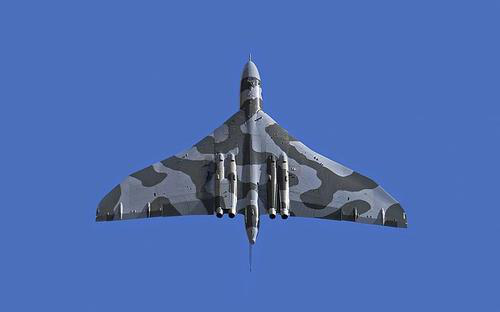

In [26]:
img

In [27]:
trans = transforms.Compose([transforms.Scale((32,32)),
                            transforms.ToTensor(),
                            transforms.Normalize(mean=(0.5, 0.5, 0.5), 
                                                 std=(0.5, 0.5, 0.5)),
                           ])
 
img = trans(img)
img = img.to(device)
# 图片扩展多一维,因为输入到保存的模型中是4维的[batch_size,通道,长，宽]，而普通图片只有三维，[通道,长，宽]
img = img.unsqueeze(0)  
    # 扩展后，为[1，1，28，28]
output = model(img)
prob = F.softmax(output,dim=1) #prob是10个分类的概率
print("概率",prob)
value, predicted = torch.max(output.data, 1)
print("类别",predicted.item())
print(value)
pred_class = classes[predicted.item()]
print("分类",pred_class)
 
 
 
    # prob = F.softmax(output, dim=1)
    # prob = Variable(prob)
    # prob = prob.cpu().numpy()  # 用GPU的数据训练的模型保存的参数都是gpu形式的，要显示则先要转回cpu，再转回numpy模式
    # print(prob)  # prob是10个分类的概率
    # pred = np.argmax(prob)  # 选出概率最大的一个
    # # print(pred)
    # # print(pred.item())
    # pred_class = classes[pred]
    # print(pred_class)

D:\Anaconda3\lib\site-packages\torchvision\transforms\transforms.py:219: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


概率 tensor([[0.6168, 0.0020, 0.1586, 0.0343, 0.0370, 0.0093, 0.0046, 0.0028, 0.1310,
         0.0035]], device='cuda:0', grad_fn=<SoftmaxBackward>)
类别 0
tensor([3.2511], device='cuda:0')
分类 plane
